<center> <b>UCGIS I-GUIDE Community Champion Project</b> </center>


# Geomasking Sensitive Individual-level Data to Protect Location Privacy
<i>Yue Lin</i>

This Jupyter notebook demonstrates how geomasking techniques can be used to protect the location privacy of individuals when releasing sensitive data.

## Notebook Outline
- [Introduction](#intro)
- [Geomasking Methods](#geomasking)
    - [Random Perturbation](#geomasking1)
- [References](#ref)

<a id='intro'></a>
## Introduction
Location privacy is an individual right that prevents a person from being identified based on his or her geographic location. Geomasking methods, which change the geographic location of an individual to protect confidentiality, are often applied before releasing individual-level data. In this notebook, we demonstrate how geomasking techniques can be used to protect privacy by providing hands-on examples and code.

We use a synthetic individual-level population data set from Guernsey County, Ohio to illustrate the use of geomasking methods. This data set contains 40,087 individual records across over 2,000 census blocks. We begin by importing and mapping this test data set as shown below. The blue dots on the map represent hypothetical original individual locations.

In [66]:
gdf

,County,Tract,BG,Block,HT,VA,E,R,S,lon,lat,geometry
0,39059,39059977200,3.906000e+11,3.906000e+14,1,1,1,1,1,-81.675832,40.075359,POINT (-9092112.076 4849385.280)
1,39059,39059977200,3.906000e+11,3.906000e+14,1,1,1,1,1,-81.681348,40.057136,POINT (-9092726.066 4846745.026)
2,39059,39059977200,3.906000e+11,3.906000e+14,1,1,1,1,1,-81.672818,40.072760,POINT (-9091776.462 4849008.731)
3,39059,39059977200,3.906000e+11,3.906000e+14,1,1,1,1,1,-81.661522,40.074032,POINT (-9090519.020 4849193.039)
4,39059,39059977200,3.906000e+11,3.906000e+14,1,1,1,1,1,-81.681704,40.066672,POINT (-9092765.742 4848126.560)
...,...,...,...,...,...,...,...,...,...,...,...,...
40082,39059,39059977800,3.906000e+11,3.906000e+14,1,2,1,1,1,-81.447123,39.983946,POINT (-9066652.254 4836147.882)
40083,39059,39059977800,3.906000e+11,3.906000e+14,1,2,1,1,2,-81.447973,39.982985,POINT (-9066746.888 4836008.810)
40084,39059,39059977800,3.906000e+11,3.906000e+14,1,2,1,1,2,-81.449277,39.984120,POINT (-9066892.078 4836173.166)
40085,39059,39059977800,3.906000e+11,3.906000e+14,1,2,1,1,2,-81.452157,39.983092,POINT (-9067212.653 4836024.293)


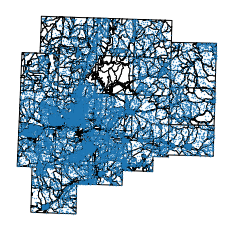

In [47]:
import pandas as pd
import geopandas as gpd

filename_poly = 'data/tl_2020_39059_tabblock10.shp'
poly = gpd.read_file(filename_poly)
poly = poly.to_crs("EPSG:3395")

filename_df = 'data/guernsey_data.csv'
df = pd.read_csv(filename_df)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(x=df.lon, y=df.lat)).set_crs("EPSG:4326")
gdf = gdf.to_crs("EPSG:3395")

base = poly.plot(color='white', edgecolor='black')
ax = gdf.plot(ax=base, markersize=0.1) 
ax.set_axis_off()

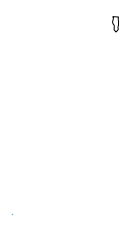

In [63]:
base = poly.loc[[103],'geometry'].plot(color='white', edgecolor='black')
ax = gdf.loc[[103],'geometry'].plot(ax=base, markersize=0.1) 
ax.set_axis_off()

<a id='geomasking'></a>
## Geomasking Methods

We here demonstrate the use of three commonly used geomasking techniques: random perturbation, Gaussian perturbation, and donut masking.

<a id='geomasking1'></a>
### Random Perturbation

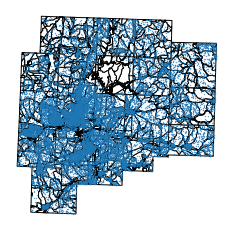

In [58]:
import random
from shapely.geometry import Point

# user-defined radius
radius = 10 

def get_random_point_in_polygon(poly):
    minx, miny, maxx, maxy = poly.bounds
    while True:
        p = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if poly.contains(p):
            return p

gdf_rp = gdf.copy()
buf = gdf_rp.buffer(radius)
for index, row in buf.iteritems():
    new_pt = get_random_point_in_polygon(row)
    gdf_rp.at[index, 'geometry'] = new_pt

base = poly.plot(color='white', edgecolor='black')
ax = gdf_rp.plot(ax=base, markersize=0.1) 
ax.set_axis_off()


<a id='ref'></a>
## References
<!-- <span id="fn1"> -->